In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sriharshaeedala/airline-delay")

print("Path to dataset files:", path)

Path to dataset files: /Users/apurva/.cache/kagglehub/datasets/sriharshaeedala/airline-delay/versions/1


In [7]:
import os
import shutil

csv_file = None
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            csv_file = os.path.join(root, file)
            print("Found CSV:", csv_file)
            break
    if csv_file:
        break

# Move and rename the file
target_path = "./flightdata.csv"
shutil.copy(csv_file, target_path)  # Use copy instead of move if you want to preserve the original
print(f"File moved to: {target_path}")

Found CSV: /Users/apurva/.cache/kagglehub/datasets/sriharshaeedala/airline-delay/versions/1/Airline_Delay_Cause.csv
File moved to: ./flightdata.csv


In [8]:
data = os.path.join(path, "Airline_Delay_Cause.csv")
df = pd.read_csv(data)
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [9]:
#------Basic Data Exploration------
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())


Dataset Shape: (171666, 21)

Column Names:
['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

Data Types:
year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_del

In [10]:
#------Understanding the structure of data------
print("\nUnique Airlines:")
print(f"Number of carriers: {df['carrier'].nunique()}")
print(df['carrier_name'].value_counts().head(10))

print("\nUnique Airports:")
print(f"Number of airports: {df['airport'].nunique()}")
print(df['airport'].value_counts().head(10))

print("\nTime Range:")
print(f"Years: {df['year'].unique()}")
print(f"Months: {sorted(df['month'].unique())}")



Unique Airlines:
Number of carriers: 21
carrier_name
SkyWest Airlines Inc.       25593
Delta Air Lines Inc.        16725
Envoy Air                   11886
American Airlines Inc.      11816
United Air Lines Inc.       11262
Southwest Airlines Co.      11109
ExpressJet Airlines Inc.    10147
Frontier Airlines Inc.       9105
Alaska Airlines Inc.         8367
Allegiant Air                8280
Name: count, dtype: int64

Unique Airports:
Number of airports: 395
airport
DTW    1535
AUS    1529
MSY    1517
RDU    1515
ATL    1510
PIT    1510
MCI    1500
DCA    1494
MSP    1486
BNA    1472
Name: count, dtype: int64

Time Range:
Years: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013]
Months: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]


In [11]:
#------Create delay rate metrics------
# Calculate delay rate (percentage of flights delayed)
df['delay_rate'] = (df['arr_del15'] / df['arr_flights']) * 100

# Calculate average delay per delayed flight
df['avg_delay_per_delayed_flight'] = df['arr_delay'] / df['arr_del15']

print("\nDelay Rate Statistics:")
print(df['delay_rate'].describe())


Delay Rate Statistics:
count    171223.000000
mean         18.336516
std          11.034877
min           0.000000
25%          10.989011
50%          17.073171
75%          24.152808
max         100.000000
Name: delay_rate, dtype: float64


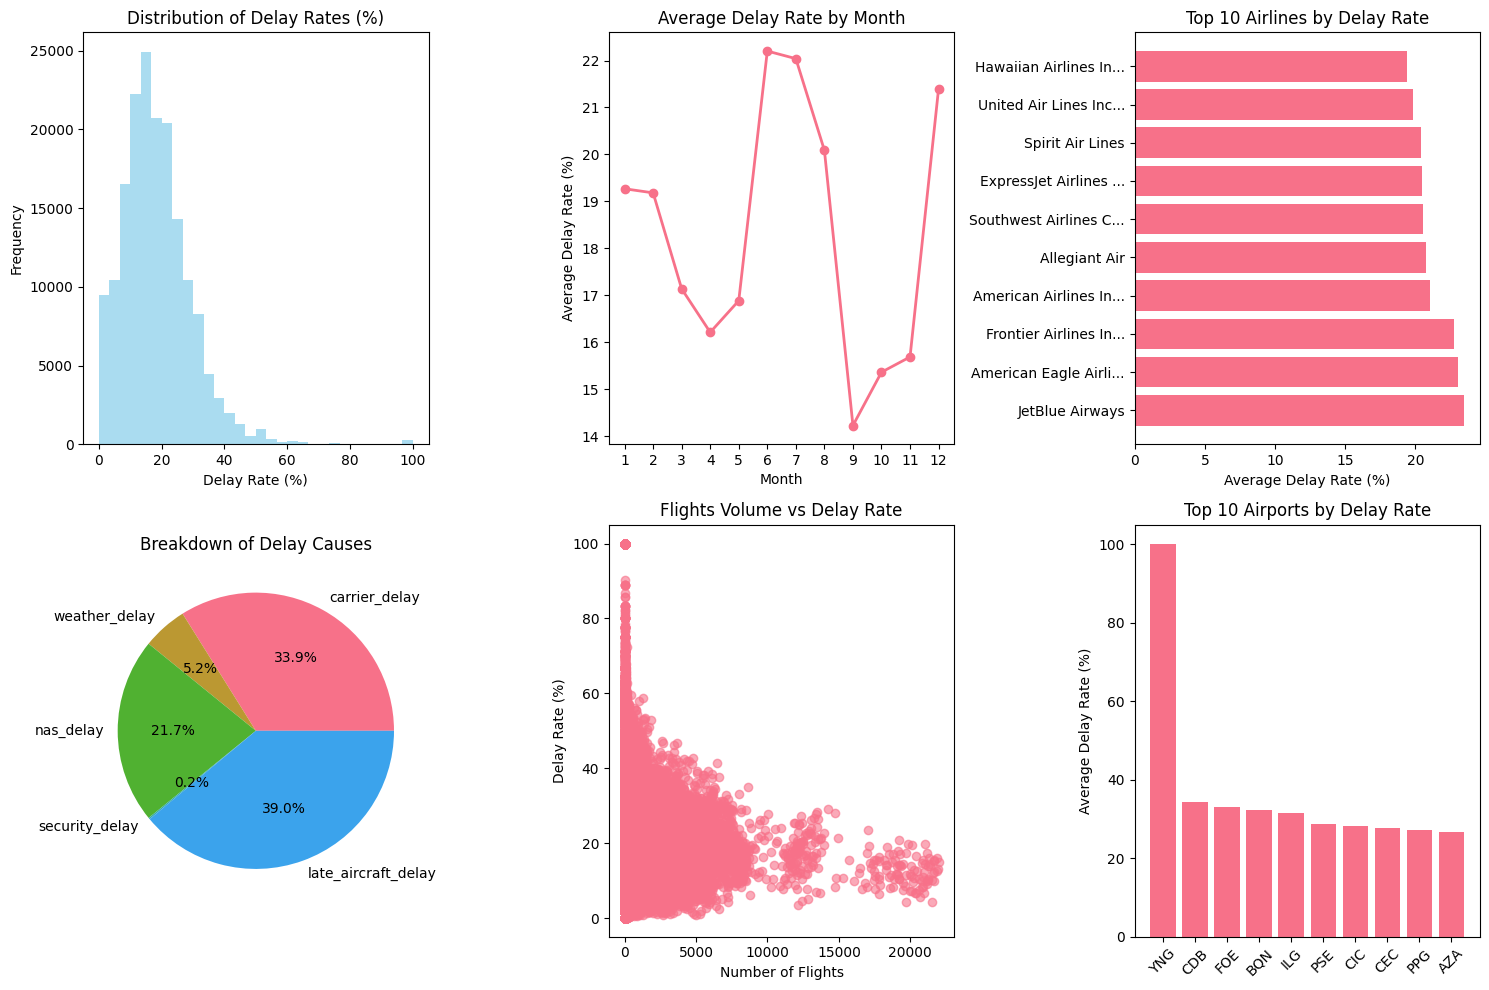

In [12]:
#------Visualisations------

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
fig_size = (15, 10)

# Create subplots for comprehensive analysis
fig, axes = plt.subplots(2, 3, figsize=fig_size)

# Plot 1: Distribution of delay rates
axes[0,0].hist(df['delay_rate'].dropna(), bins=30, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Delay Rates (%)')
axes[0,0].set_xlabel('Delay Rate (%)')
axes[0,0].set_ylabel('Frequency')

# Plot 2: Delays by month
monthly_delays = df.groupby('month')['delay_rate'].mean()
axes[0,1].plot(monthly_delays.index, monthly_delays.values, marker='o', linewidth=2)
axes[0,1].set_title('Average Delay Rate by Month')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Average Delay Rate (%)')
axes[0,1].set_xticks(range(1, 13))

# Plot 3: Top 10 airlines by delay rate
airline_delays = df.groupby('carrier_name')['delay_rate'].mean().sort_values(ascending=False).head(10)
axes[0,2].barh(range(len(airline_delays)), airline_delays.values)
axes[0,2].set_yticks(range(len(airline_delays)))
axes[0,2].set_yticklabels([name[:20] + '...' if len(name) > 20 else name for name in airline_delays.index])
axes[0,2].set_title('Top 10 Airlines by Delay Rate')
axes[0,2].set_xlabel('Average Delay Rate (%)')

# Plot 4: Delay causes breakdown
delay_causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
cause_totals = df[delay_causes].sum()
axes[1,0].pie(cause_totals.values, labels=cause_totals.index, autopct='%1.1f%%')
axes[1,0].set_title('Breakdown of Delay Causes')

# Plot 5: Number of flights vs delay rate scatter
axes[1,1].scatter(df['arr_flights'], df['delay_rate'], alpha=0.6)
axes[1,1].set_xlabel('Number of Flights')
axes[1,1].set_ylabel('Delay Rate (%)')
axes[1,1].set_title('Flights Volume vs Delay Rate')

# Plot 6: Top 10 airports by delay rate
airport_delays = df.groupby('airport')['delay_rate'].mean().sort_values(ascending=False).head(10)
axes[1,2].bar(range(len(airport_delays)), airport_delays.values)
axes[1,2].set_xticks(range(len(airport_delays)))
axes[1,2].set_xticklabels(airport_delays.index, rotation=45)
axes[1,2].set_title('Top 10 Airports by Delay Rate')
axes[1,2].set_ylabel('Average Delay Rate (%)')

plt.tight_layout()
plt.show()


DETAILED ANALYSIS

Top 10 Airlines with Highest Delay Rates:
                              delay_rate  arr_flights  arr_del15  \
carrier_name                                                       
JetBlue Airways                    23.43    2609697.0   647919.0   
American Eagle Airlines Inc.       23.02     279283.0    61132.0   
Frontier Airlines Inc.             22.73    1158943.0   291403.0   
American Airlines Inc.             21.01    7973061.0  1538261.0   
Allegiant Air                      20.74     613357.0   149943.0   
Southwest Airlines Co.             20.54   12522217.0  2460563.0   
ExpressJet Airlines Inc.           20.45    2637669.0   540578.0   
Spirit Air Lines                   20.40    1526076.0   330708.0   
United Air Lines Inc.              19.82    5464237.0  1030741.0   
Hawaiian Airlines Inc.             19.42     727265.0    89794.0   

                              total_delay_rate  
carrier_name                                    
JetBlue Airways        

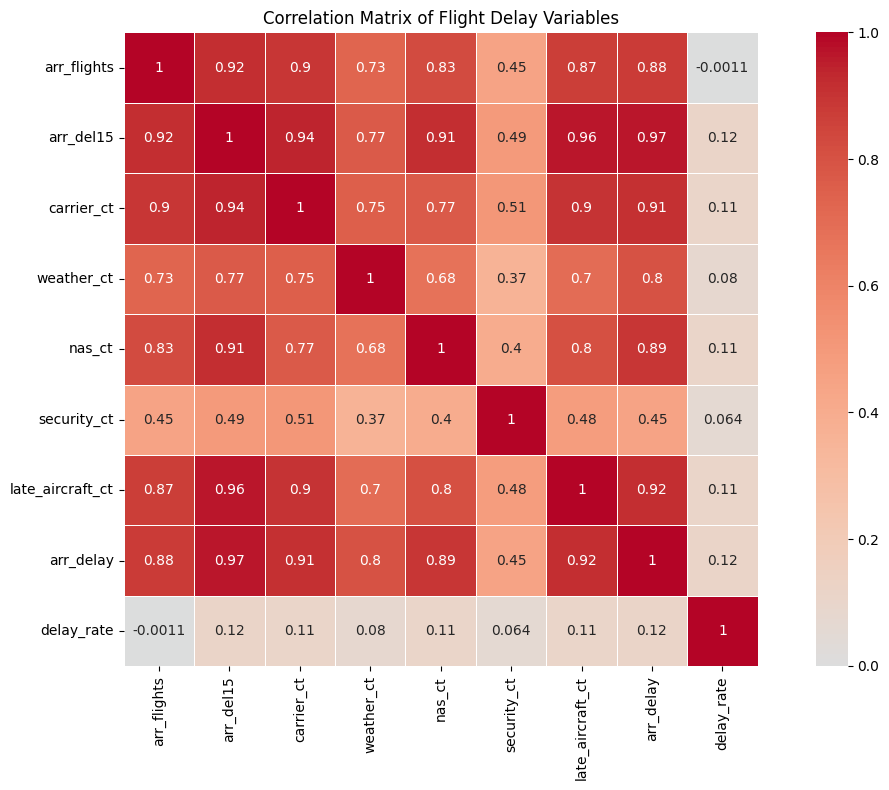

In [13]:
#------Detail analysis of some important table-----
print("\n" + "="*50)
print("DETAILED ANALYSIS")
print("="*50)

# Top 10 worst performing airlines
print("\nTop 10 Airlines with Highest Delay Rates:")
worst_airlines = df.groupby('carrier_name').agg({
    'delay_rate': 'mean',
    'arr_flights': 'sum',
    'arr_del15': 'sum'
}).sort_values('delay_rate', ascending=False).head(10)
worst_airlines['total_delay_rate'] = (worst_airlines['arr_del15'] / worst_airlines['arr_flights']) * 100
print(worst_airlines.round(2))

# Top 10 worst performing airports
print("\nTop 10 Airports with Highest Delay Rates:")
worst_airports = df.groupby(['airport', 'airport_name']).agg({
    'delay_rate': 'mean',
    'arr_flights': 'sum',
    'arr_del15': 'sum'
}).sort_values('delay_rate', ascending=False).head(10)
print(worst_airports.round(2))

# Correlation analysis
print("\nCorrelation between numerical variables:")
numerical_cols = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
                 'security_ct', 'late_aircraft_ct', 'arr_delay', 'delay_rate']
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Flight Delay Variables')
plt.tight_layout()
plt.show()

In [14]:
#------Key insights from this dataset's Analysis------
print("\n" + "="*50)
print("KEY INSIGHTS")
print("="*50)

total_flights = df['arr_flights'].sum()
total_delayed = df['arr_del15'].sum()
overall_delay_rate = (total_delayed / total_flights) * 100

print(f"Overall Statistics:")
print(f"- Total flights analyzed: {total_flights:,.0f}")
print(f"- Total delayed flights: {total_delayed:,.0f}")
print(f"- Overall delay rate: {overall_delay_rate:.2f}%")

print(f"\nWorst performing airline: {worst_airlines.index[0]} ({worst_airlines.iloc[0]['delay_rate']:.2f}% delay rate)")
print(f"Best month for travel: Month {monthly_delays.idxmin()} ({monthly_delays.min():.2f}% delay rate)")
print(f"Worst month for travel: Month {monthly_delays.idxmax()} ({monthly_delays.max():.2f}% delay rate)")

# Main delay cause
main_cause = cause_totals.idxmax()
main_cause_pct = (cause_totals.max() / cause_totals.sum()) * 100
print(f"Main cause of delays: {main_cause} ({main_cause_pct:.1f}% of total delay time)")



KEY INSIGHTS
Overall Statistics:
- Total flights analyzed: 62,146,805
- Total delayed flights: 11,375,095
- Overall delay rate: 18.30%

Worst performing airline: JetBlue Airways (23.43% delay rate)
Best month for travel: Month 9 (14.23% delay rate)
Worst month for travel: Month 6 (22.20% delay rate)
Main cause of delays: late_aircraft_delay (39.0% of total delay time)
